<a href="https://colab.research.google.com/github/satyamnewale/numpy-notebooks/blob/main/Pairwise%20Cosine%20Similarity%20Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

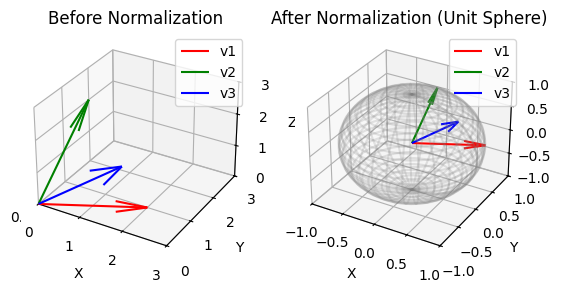

Vectorized Cosine Similarity:
 [[1.    0.316 0.632]
 [0.316 1.    0.5  ]
 [0.632 0.5   1.   ]]

Sklearn Cosine Similarity:
 [[1.    0.316 0.632]
 [0.316 1.    0.5  ]
 [0.632 0.5   1.   ]]


In [28]:
# ==========================
# Pairwise Cosine Similarity Visualization
# ==========================

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics.pairwise import cosine_similarity

# 1. Create non-collinear 3D vectors
V = np.array([
    [2, 1, 0],    # Vector 1
    [0, 2, 2],    # Vector 2
    [2, 0, 2]     # Vector 3
])

# 2. Normalize each vector using broadcasting
V_norm = np.linalg.norm(V, axis=1, keepdims=True)
V_normalized = V / V_norm


# 3. Compute cosine similarity (vectorized)
similarity = V_normalized @ V_normalized.T

# 4. Verify with sklearn
similarity_sklearn = cosine_similarity(V)

# 5. 3D Visualization of vectors
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(141, projection='3d')

colors = ['r', 'g', 'b']
# ---- (A) Before Normalization ----
ax1 = fig.add_subplot(131, projection='3d')
for i, v in enumerate(V):
    ax1.quiver(0, 0, 0, v[0], v[1], v[2],
               color=colors[i], length=1.0,
               normalize=False, label=f'v{i+1}')
ax1.set_xlim([0, 3])
ax1.set_ylim([0, 3])
ax1.set_zlim([0, 3])
ax1.set_title('Before Normalization')
ax1.set_xlabel('X'); ax1.set_ylabel('Y'); ax1.set_zlabel('Z')
ax1.legend()

# ---- (B) After Normalization ----
ax2 = fig.add_subplot(132, projection='3d')
for i, v in enumerate(V_normalized):
    ax2.quiver(0, 0, 0, v[0], v[1], v[2],
               color=colors[i], length=1.0,
               normalize=False, label=f'v{i+1}')
# Draw a wireframe sphere to show unit radius
u = np.linspace(0, 2 * np.pi, 60)
v = np.linspace(0, np.pi, 30)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones_like(u), np.cos(v))
ax2.plot_wireframe(x, y, z, color='gray', alpha=0.2)

ax2.set_xlim([-1, 1])
ax2.set_ylim([-1, 1])
ax2.set_zlim([-1, 1])
ax2.set_title('After Normalization (Unit Sphere)')
ax2.set_xlabel('X'); ax2.set_ylabel('Y'); ax2.set_zlabel('Z')
ax2.legend()

# Display both plots
plt.show()

# 6. Print comparison
print("Vectorized Cosine Similarity:\n", np.round(similarity, 3))
print("\nSklearn Cosine Similarity:\n", np.round(similarity_sklearn, 3))




a vector represents both direction and magnitude. it starts from the origin and ends at a specific point in space. in a graph it is shown as an arrow pointing from the center outward.

a matrix is a collection of vectors. each row of the matrix represents one vector. the number of rows shows how many vectors you have and the number of columns shows the dimensions of each vector.

the norm of a vector means its total length or magnitude. it tells how far the arrow’s tip is from the origin. on a graph this is simply the length of the arrow.

normalization means scaling the vector so that its length becomes one while its direction stays the same. this removes the effect of size and keeps only direction. after normalization all vector tips lie on the surface of an imaginary sphere with radius one around the origin.

in numpy broadcasting is used to divide each vector by its own length automatically. it makes sure each row of the matrix is normalized independently without writing loops.

cosine similarity measures how much two vectors point in the same direction. if they point exactly the same way the value is one, if they are perpendicular it is zero, and if they point in opposite directions it is minus one. this focuses only on direction, not on size.

a cosine similarity matrix is created by multiplying the normalized matrix with its transpose. each cell in the matrix shows how similar one vector is to another. the diagonal values are always one because every vector is perfectly similar to itself.

before normalization vectors are of different lengths and may reach different distances from the origin. after normalization all vectors are of equal length and end on the unit sphere. this allows us to compare only their angles and directions.

on a graph before normalization arrows look uneven in size. after normalization all arrows become the same size but point in various directions. this makes it easy to visualize their angular relationship.

the cosine similarity heatmap shows how closely aligned each pair of vectors is. red or bright areas mean high similarity while blue or dark areas mean low similarity.

overall, normalization removes scale differences, broadcasting handles efficient scaling, and cosine similarity captures the directional closeness between vectors.

the entire process—creating vectors, normalizing them, and comparing them—helps in understanding how data points relate in direction rather than distance, which is critical in many ai and machine learning models.

